# Fraud Detection Machine Learning on Enron Enteprise Dataset




## Abstract


All through history, corruption and fraud has been present. It is known cases in which one book author published its book in the name of a more famous one. The fraud was detected by the use of Machine Learning.

In such contexts, it is difficult, if not impossible, to find efficient patterns without making use of Artificial Inteligence (AI). And since Machine Learning has become a buzzword and has proven its efficiency. This work explores a subfield of AI called Supervised Classificaton. 

This paper covers Naive Bayes, Support Vector Mahcine (SVM), and Decision Tree supervised classification algorithms, working on a pre-processed list of email texts based on the Enron Corporation dataset. As such, they will predict email authors by their writting style and content of words

The purpose of this work is to understand complexity, strengths, weaknessess and how to improve accuracy and performance of the algorithms mentioned above.

It is holped this study will guide practicioners to manage these techniques to reach their expected results.


## Introduction

Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 as the result of a merger between Houston Natural Gas and InterNorth. 

In the 1990s, the company became a leading energy marketer of natural gas, crude oil, electricity and liquids in North America, Europe and the rest of the world. It employed approximately 20,000 staff and was one of the world's major electricity, natural gas, communications and pulp and paper companies, with claimed revenues of nearly $101 billion during 2000. It was named as America's Most Innovative Company. 

However, the CEO Jeffrey Skilling had a way of hiding the financial losses of the trading business and other operations of the company, it was called ** mark-to-market accounting **. This is a technique used when trading securities where you measure the value of a security based on its current market value, instead of its book value. This can work well for securities, but it can be disastrous for other businesses.

In Enron's case, the company would build an asset, such as a power plant, and immediately claim the projected profit on its books, even though it hadn't made any money from it. If the revenue from the power plant were less than the projected amount, instead of taking the loss, the company would then transfer these assets to an off-the-books corporation, where the loss would go unreported. This type of accounting enabled Enron to write off losses without hurting the company's bottom line.

At the end of 2001, the company's corruption emmerged as a great fraud scandal and soon after this the company filed for bankruptcy.  After that, many rules and regulations were changed to be able to audit and prenvent cases like this one. 

This scandal brought into question the accounting practices and activities of many corporations in the United States and many rules and regulations were changed to be able to audit and prenvent cases like this one.  

Many wonder how such a powerful business disintegrated so quickly and how it managed to fool the regulators for so long.

Due to this interesting case, the company's financial and emails data became public for studies purpose. And this case became a point of interest for machine learning analysis because it could assist in finding solutions on how to prevent similar situations to happen. 

## Data Source

The original [dataset](https://www.cs.cmu.edu/~./enron/) was collected and prepared by the CALO Project, and contains financial data and text features, that were extracted from emails comprised of 146 users with 21 features each. 

For the experiments in this paper though, two other datasets will be used as the data sources(/data): **word_data.pkl** corresponding to the **features**, and **email_authors.pkl** to the **labels**.

They were created  by Katie Malone for Udacity machine learning training course, and represent 8.000 emails per user, belonging to two users: Chris and Sara. 



## Related Works

Contents and instructions used for this paper where based on the "Udacity - Introduction to Machine Leaning course", and were adaped according to the goals explained here.

https://github.com/mdegis/machine-learning <br>
https://github.com/baumanab/udacity_intro_machinelearning_project<br>
https://github.com/skl92/machine-learning-enron-email-analysis<br>
https://github.com/dshgna/ud120-projects<br>



## Methodology

Three different classifiers will be trainned to predict autors emails by their word content and style:

For performing the experiments, estimators will have their parameters tunned by the use of scikit-learn GridSearchCV library, that considers all parameter combinations and provide outputs of their scores. 

Each experiment can be executed against only a portion or full dataset. Partial dataset is intended to speed up results so as to focus on finding the parameters values combinations, while fulll dataset is meant to verify how well  estimators perform in a larger scale. The function to train partial dataset is named "train_predict". For full dataset the name is "train_predict_fulldataset". This can be changed in source code in the sections "Train and Predict".

For each experiment, there will be a cell (below descriptions) to reproduce results and the option to access the code and have the chance to change values for other results.


###   * SVM

Support Vector Machine can work with classification or regression, but it is mostly applied to classification. 

While Support Vectors are the co-ordinates of individual observation, Support Vector Machine is a frontier which best segregates two classes. It has a feature that igores the outliers and tend to be quite robust with them.
<img src="../figures/svm3.png" />
For this experiment values are changed for parameters:

**C:** controls the tradeoff between smooth decision boundary and classification training points correctly. In theory, a large value of C means that you will get more training points correctly.

**gamma:** defines how far a the influence of a single training example reaches. If gamma has a low value, every point has a far reach. If gamma has a high value, each training example has a close reach. High value might make the decision boundary less linear, for it will be closer to training points.

**kernel** parameter can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.

GridSearch will make testes making combinations with different parameter and values:
kernel: rbf and linear
gamma: 1e-3, 1e-4
C: 1, 10, 100, 1000

[code access](../dev/svm_gridsearch.ipynb)


/home/eduardo/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Number of available emails to be trained for Chris: 7936
Number of available emails to be trained for Sara: 7884


('Please await, processing the result:', 'SVM Focus on Best Parameters with GridSearchCV')



********** Results for experiment: " SVM Focus on Best Parameters with GridSearchCV " ************

Training time: 3.861 s
Predicting time: 0.864 s

Number of Predicted emails for Chris 1013
Number of Predicted emails for Sara 745


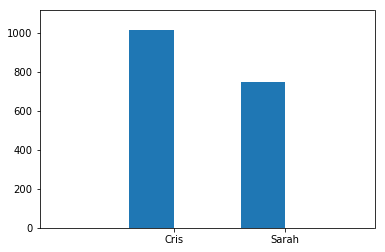

Best Param: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
Best Avarage Score: 0.917721518987


In [1]:
%run ../dev/svm_gridsearch.ipynb


###  * GaussianNB (Naive Bayes)

Naive Bayes,based on Bayes’ Theorem, works with the assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

Equation:

<img src="../figures/bayes.png" />

* P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
* P(c) is the prior probability of class.
* P(x|c) is the likelihood which is the probability of predictor given class.
* P(x) is the prior probability of predictor.

It uses Posterior Probability, giving the rank occurance provided text. In order words, it will be trained with frequent texts(features) used by Chris and Sarah(labels), and it will calculate the probabily and determine if each test email is from Chris or Sara.

It is possible to work with parameters, similarly to SVM, but parameter tune for this classifier makes no changes in results. As such, GridSearchCV is not applied to this scenario.

[code access](../dev/bayes.ipynb)


Number of available emails to be trained for Chris: 7936
Number of available emails to be trained for Sara: 7884


('Please await, processing the result:', 'Train and Predict Data with GaussianNB')



********** Results for experiment: " Train and Predict Data with GaussianNB " ************

Training time: 0.007 s
Predicting time: 0.118 s

Number of Predicted emails for Chris 791
Number of Predicted emails for Sara 967


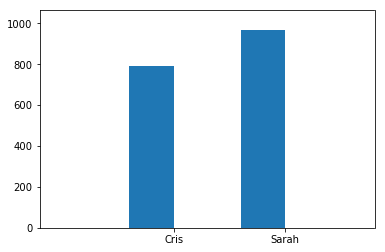

Total Accuracy: 0.919226393629


In [2]:
%run ../dev/bayes.ipynb

###  * Decision Tree

Decision tree works with classification or regression models, and it breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. The final outcome is a tree with decision nodes and leaf nodes.

Equation Entropy with 1 attribute:
<img src="../figures/tree1.png" />

Equation Entropy with 2 attributes:
<img src="../figures/tree2.png" />

GridSearchCV will be instatiate with the tree estimator, the parameters below and will make the predictions:
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }
              
[code access](../dev/decitionTree_gridsearch.ipynb)


Number of available emails to be trained for Chris: 7936
Number of available emails to be trained for Sara: 7884


('Please await, processing the result:', 'Decision Tree Focus on Best Parameters with GridSearchCV')



********** Results for experiment: " Decision Tree Focus on Best Parameters with GridSearchCV " ************

Training time: 11.72 s
Predicting time: 0.012 s

Number of Predicted emails for Chris 997
Number of Predicted emails for Sara 761


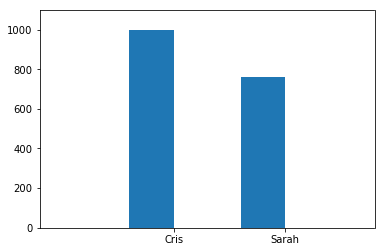

Best Param: {'min_samples_split': 2, 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5}
Best Avarage Score: 0.791139240506


In [3]:
%run ../dev/decitionTree_gridsearch.ipynb

#### Tree Experiment  - Focus on percentile  parameter.

By changing percentile parameter to a higher number, it was possible to achieve improvements in accuracy.


[code access](../dev/decitionTree_withPercentile_gridsearch.ipynb)


Number of available emails to be trained for Chris: 7936
Number of available emails to be trained for Sara: 7884


('Please await, processing the result:', 'Decision Tree Focus on Best Parameters with GridSearchCV')



********** Results for experiment: " Decision Tree Focus on Best Parameters with GridSearchCV " ************

Training time: 3.407 s
Predicting time: 0.001 s

Number of Predicted emails for Chris 803
Number of Predicted emails for Sara 955


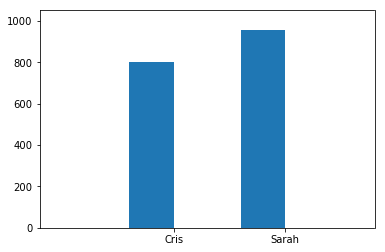

Best Param: {'min_samples_split': 10, 'max_leaf_nodes': 20, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Best Avarage Score: 0.810126582278


In [5]:
%run ../dev/decitionTree_withPercentile_gridsearch.ipynb

## Summury of Results

These experiments explored ways to use algorithm and configuration options on how to find most suitable approaches for handling text identification using machine learning.


#### Analysis with Reduced DataSet:
When working with SVM with only kernel parameter, linear value is better. However, when we added the gamma parameter with linear option, accuracy was badly affected. C parameter with high or low value, made no difference in results with linear kernel value.

Making a cross comparation among the options above, best linear result were met working with no other paramenters except kernel=linear. 

With regards to RBF, we rechead the highest SVM accuracy by combining Linear kernel=rbf and Gamma parameter with Low value (0.889078498294).

The best result with reduced dataset was reached with the combination kernel='linear', C=10000 = (0.892491467577)

Decison tree present bad accuracy with reduced dataset, around 0.776450511945.


#### Analysis with Full DataSet:


Altough SVM full dataset reached highest accuracy of all (0.990898748578), it was the slowest algorithm.

Decision Tree presented great accuracy and performance with larger datasets.

When we tested naive bayes, accuracy with full dataset was (0.973265073948). It was the second best result of all experiments but performance was much better than SVM.

**Conclusion:**
Based on the experiments here presented, I would exclude SVM due to complexity and slow performance. Even though accuracy was the best.

Results suggests that Decision Tree and GaussianNB (Naive Bayes) would be great options to work with larger datasets and meet good accuarcy and performance. 

GaussianNB presented the best perfomance of all and good accuracy.


## References
 Main: https://classroom.udacity.com/courses/ud120